# ANÁLISIS DE MARGEN PARA LA CUENTA TRIANA EN EL MES DE JUNIO DEL 2025

In [11]:
import pandas as pd
import numpy as np
import re
from openpyxl import load_workbook
from pipeline.finanzas.contabilidad_y_finanzas import analisis_margen

In [12]:
triana = analisis_margen(archivo_excel_ventas='/Users/martincarrasco/Desktop/Martín_Carrasco/Reportes/2025/Cuentas RDS/Tri parts (TRIANA)/VENTAS TRIANA JUNIO 2025.xlsx',
                         archivo_excel_costos='/Users/martincarrasco/Desktop/Martín_Carrasco/Reportes/2025/Cuentas RDS/Costos proveedores RDS al 01-07 (1).xlsx',
                         nombre_hoja_ventas='Ventas CL',
                         nombre_hoja_costos='Sheet1')

Existen 1693 registros en la base de datos de ventas
Index(['# de venta', 'Fecha de venta', 'Estado', 'Paquete de varios productos',
       'Pertenece a un kit', 'Unidades', 'Ingresos por productos (CLP)',
       'Cargo por venta e impuestos (CLP)', 'Ingresos por envío (CLP)',
       'Costos de envío (CLP)', 'Anulaciones y reembolsos (CLP)',
       'Total (CLP)', 'SKU', '# de publicación', 'Título de la publicación',
       'Precio unitario de venta de la publicación (CLP)', 'Forma de entrega'],
      dtype='object')
1579 sin considerar las ventas en paquete
De todos los registros, 1468 son ventas
Se eliminaron 18286 SKU repetidos de la base de datos de costos
Se eliminaron 72 ventas completas por tener algún SKU sin precio.


In [13]:
triana

,# de venta,Fecha de venta,Estado,Unidades,Forma de entrega,Ingresos por productos (CLP) Neto,Cargo por venta e impuestos (CLP) Neto,Ingresos por envío (CLP) Neto,Costos de envío (CLP) Neto,Costo producto,Costo producto total,Costo total,Margen
0,2000008044224665,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,49571.428571,-7435.294118,0.000000,-2605.042017,29608.0,29608.0,39648.336134,0.200178
1,2000008044694359,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,19319.327731,-2897.478992,0.000000,-2605.042017,9800.0,9800.0,15302.521008,0.207916
2,2000008044736881,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,53773.109244,-7528.571429,0.000000,-4621.848739,15059.0,15059.0,27209.420168,0.493996
3,2000008045689157,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,36126.050420,-5418.487395,0.000000,-4915.966387,17954.0,17954.0,28288.453782,0.216951
4,2000008045740871,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,18478.991597,-2771.428571,0.000000,-2521.008403,8691.0,8691.0,13983.436975,0.243279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,2000012128800748,2025-06-30,Etiqueta lista para imprimir,1.0,Colecta de Mercado Envíos,15117.647059,-3107.563025,4109.243697,-4109.243697,6580.0,6580.0,9687.563025,0.359188
1392,2000012129244420,2025-06-30,Etiqueta lista para imprimir,1.0,Colecta de Mercado Envíos,43689.075630,-6552.941176,0.000000,-4621.848739,24812.0,24812.0,35986.789916,0.176298
1393,2000012130089264,2025-06-30,Etiqueta lista para imprimir,1.0,Colecta de Mercado Envíos,5873.949580,-1468.907563,4109.243697,-4109.243697,2006.0,2006.0,3474.907563,0.408421
1394,2000012130253898,2025-06-30,Acuerdas la entrega,1.0,Acuerdo con el comprador,55453.781513,-8317.647059,0.000000,0.000000,30227.0,30227.0,38544.647059,0.304923


In [14]:
triana = triana[triana['Costo producto'] != 0]
triana

,# de venta,Fecha de venta,Estado,Unidades,Forma de entrega,Ingresos por productos (CLP) Neto,Cargo por venta e impuestos (CLP) Neto,Ingresos por envío (CLP) Neto,Costos de envío (CLP) Neto,Costo producto,Costo producto total,Costo total,Margen
0,2000008044224665,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,49571.428571,-7435.294118,0.000000,-2605.042017,29608.0,29608.0,39648.336134,0.200178
1,2000008044694359,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,19319.327731,-2897.478992,0.000000,-2605.042017,9800.0,9800.0,15302.521008,0.207916
2,2000008044736881,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,53773.109244,-7528.571429,0.000000,-4621.848739,15059.0,15059.0,27209.420168,0.493996
3,2000008045689157,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,36126.050420,-5418.487395,0.000000,-4915.966387,17954.0,17954.0,28288.453782,0.216951
4,2000008045740871,2025-06-01,Entregado,1.0,Colecta de Mercado Envíos,18478.991597,-2771.428571,0.000000,-2521.008403,8691.0,8691.0,13983.436975,0.243279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,2000012128800748,2025-06-30,Etiqueta lista para imprimir,1.0,Colecta de Mercado Envíos,15117.647059,-3107.563025,4109.243697,-4109.243697,6580.0,6580.0,9687.563025,0.359188
1392,2000012129244420,2025-06-30,Etiqueta lista para imprimir,1.0,Colecta de Mercado Envíos,43689.075630,-6552.941176,0.000000,-4621.848739,24812.0,24812.0,35986.789916,0.176298
1393,2000012130089264,2025-06-30,Etiqueta lista para imprimir,1.0,Colecta de Mercado Envíos,5873.949580,-1468.907563,4109.243697,-4109.243697,2006.0,2006.0,3474.907563,0.408421
1394,2000012130253898,2025-06-30,Acuerdas la entrega,1.0,Acuerdo con el comprador,55453.781513,-8317.647059,0.000000,0.000000,30227.0,30227.0,38544.647059,0.304923


In [15]:
margen_promedio = triana['Margen'].mean()
margen_promedio

np.float64(0.24915116633010725)

<Axes: >

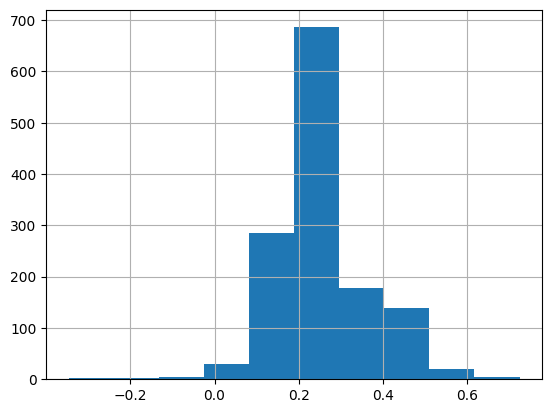

In [16]:
triana['Margen'].hist()

In [17]:
triana['Estado'].unique()

array(['Entregado', 'Mediación finalizada. Te dimos el dinero.',
       'En camino', 'Procesando en la bodega',
       'Etiqueta lista para imprimir', 'Listo para recolección',
       'Despacharemos el paquete el 1 de julio', 'Venta concretada',
       'Venta entregada', 'Acuerdas la entrega',
       'Etiqueta para imprimir. Está demorado 1 día y eso afectó tu reputación'],
      dtype=object)

In [18]:
triana['Estado'].nunique()

11

In [19]:
triana['# de venta'].duplicated

<bound method Series.duplicated of 0       2000008044224665
1       2000008044694359
2       2000008044736881
3       2000008045689157
4       2000008045740871
              ...       
1391    2000012128800748
1392    2000012129244420
1393    2000012130089264
1394    2000012130253898
1395    2000012130661316
Name: # de venta, Length: 1353, dtype: object>